In [2]:
import pandas as pd

from sklearn import preprocessing

df = pd.read_csv('cars.csv')

df.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,Price
0,Mercedes-Benz,sedan,68,6.0,Petrol,yes,2011,S 600,300000.0
1,Mercedes-Benz,other,37,5.0,Petrol,yes,2012,G 500,300000.0
2,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S-Guard,295000.0
3,Mercedes-Benz,sedan,29,6.0,Petrol,yes,2011,S 600,295000.0
4,Mercedes-Benz,other,6,5.5,Petrol,yes,2016,S 63 AMG,250000.0


In [3]:
le_brand = preprocessing.LabelEncoder()
le_brand.fit(df['Brand']) 

le_body = preprocessing.LabelEncoder()
le_body.fit(df['Body']) 

le_model = preprocessing.LabelEncoder()
le_model.fit(df['Model']) 

le_enginetype = preprocessing.LabelEncoder()
le_enginetype.fit(df['Engine Type']) 

le_reg = preprocessing.LabelEncoder()
le_reg.fit(df['Registration']) 


df['Brand_num'] = le_brand.transform(df['Brand']) 
df['Body_num'] = le_body.transform(df['Body']) 
df['Model_num'] = le_model.transform(df['Model']) 
df['EngineType_num'] = le_enginetype.transform(df['Engine Type']) 
df['Registration_num'] = le_reg.transform(df['Registration']) 

df=df.drop(columns=['Brand','Body','Engine Type','Registration','Model'])
df.head()

,Mileage,EngineV,Year,Price,Brand_num,Body_num,Model_num,EngineType_num,Registration_num
0,68,6.0,2011,300000.0,2,3,239,3,1
1,37,5.0,2012,300000.0,2,2,127,3,1
2,29,6.0,2011,295000.0,2,3,242,3,1
3,29,6.0,2011,295000.0,2,3,239,3,1
4,6,5.5,2016,250000.0,2,2,240,3,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mileage           4173 non-null   int64  
 1   EngineV           4025 non-null   float64
 2   Year              4173 non-null   int64  
 3   Price             4173 non-null   float64
 4   Brand_num         4173 non-null   int32  
 5   Body_num          4173 non-null   int32  
 6   Model_num         4173 non-null   int32  
 7   EngineType_num    4173 non-null   int32  
 8   Registration_num  4173 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 212.0 KB


In [5]:
df['EngineV'].fillna(value=df['EngineV'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4173 entries, 0 to 4172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mileage           4173 non-null   int64  
 1   EngineV           4173 non-null   float64
 2   Year              4173 non-null   int64  
 3   Price             4173 non-null   float64
 4   Brand_num         4173 non-null   int32  
 5   Body_num          4173 non-null   int32  
 6   Model_num         4173 non-null   int32  
 7   EngineType_num    4173 non-null   int32  
 8   Registration_num  4173 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 212.0 KB


In [6]:
df.describe()

,Mileage,EngineV,Year,Price,Brand_num,Body_num,Model_num,EngineType_num,Registration_num
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,164.141625,2.762127,2006.365684,19218.579430,3.171340,2.562425,163.211598,1.301941,0.905584
std,104.763054,4.846869,6.685332,24625.021129,2.084648,1.642627,86.903844,1.359738,0.292442
min,0.000000,0.600000,1969.000000,600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,1.900000,2003.000000,6999.000000,1.000000,1.000000,98.000000,0.000000,1.000000
50%,158.000000,2.200000,2007.000000,11500.000000,3.000000,3.000000,162.000000,1.000000,1.000000
75%,230.000000,3.000000,2012.000000,21700.000000,5.000000,3.000000,226.000000,3.000000,1.000000
max,980.000000,99.990000,2016.000000,300000.000000,6.000000,5.000000,305.000000,3.000000,1.000000


In [7]:
df.columns

Index(['Mileage', 'EngineV', 'Year', 'Price', 'Brand_num', 'Body_num',
       'Model_num', 'EngineType_num', 'Registration_num'],
      dtype='object')

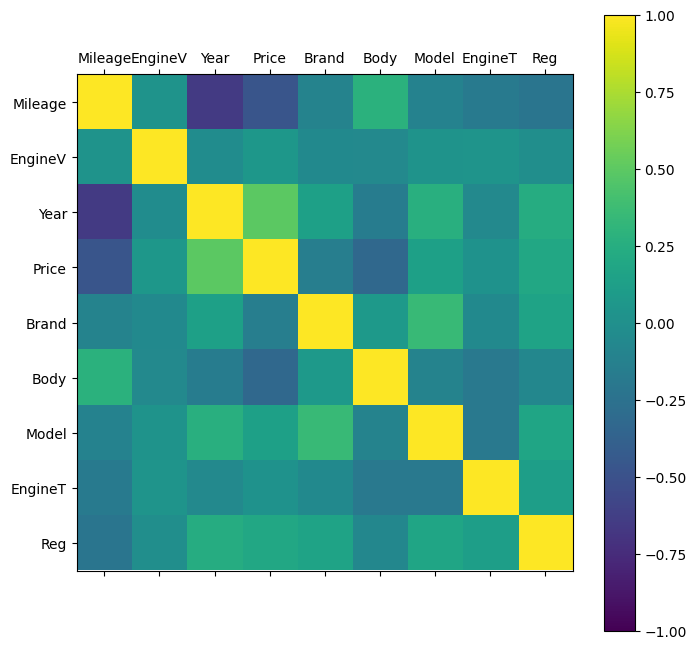

In [8]:
import matplotlib.pyplot as plt

correlations = df.corr(method='pearson')
 
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(1,1,1)

cax = ax.matshow(correlations, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = [0,1,2,3,4,5,6,7,8]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(["Mileage","EngineV","Year","Price","Brand","Body","Model","EngineT","Reg"])
ax.set_yticklabels(["Mileage","EngineV","Year","Price","Brand","Body","Model","EngineT","Reg"])

plt.show()

In [13]:
X = df[['Year','Mileage' ,'Body_num','Brand_num']]

y = df['Price']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train.values, y_train)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -2614167.034346223
Coefficients: [ 1324.02623713   -48.49173472 -2994.13628945 -2373.47486834]


In [16]:
y_pred = model.predict(X_test.values)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

print ('MSE :', mean_squared_error (y_pred, y_test))
print ('RMSE :', sqrt(mean_squared_error (y_pred, y_test)))
print ('MAE :', mean_absolute_error(y_pred, y_test))

MSE : 428303889.23055476
RMSE : 20695.50408254302
MAE : 10718.98256820487


In [17]:
year = 2018
milage = 60
body = 'sedan'
brand = 'Toyota'

body_num = le_body.transform([body])[0]
brand_num = le_brand.transform([brand])[0]

example = [[year, milage, body_num, brand_num]]
print(example)

ypred = model.predict(example)
print(ypred)

[[2018, 60, 3, 5]]
[33958.62489708]


In [18]:
ypred = model.intercept_ + model.coef_[0] * year + model.coef_[1] * milage + model.coef_[2] * body_num + model.coef_[3] * brand_num
print(ypred)

33958.624897078684
